## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.8.2
- 성명 : 채승혜
- 점수 : 98
10번에 통계요약표 안구함(-2)

Q1. 표준 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(-3,3,0.1) 

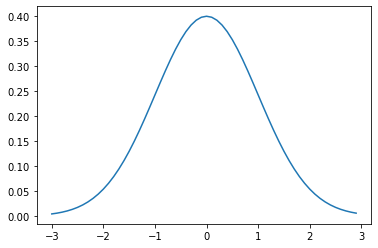

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


x= np.arange(-3,3,0.1)
plt.plot(x,stats.norm.pdf(x=x))


Q2. 표준 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,3,0.1)

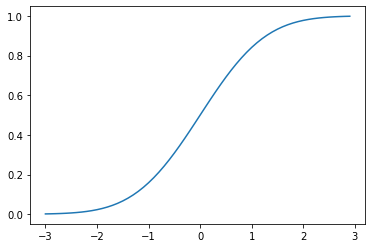

In [2]:
x= np.arange(-3,3,0.1)
plt.plot(x,stats.norm.cdf(x=x))


Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 B, A로 변경하세요.
- df2의 length를 species가 A인 것은 2배로 B인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [26]:
df1 = pd.read_csv('dataset/5_2_fm.csv')

In [27]:
# 1
df2= df1.copy()
df2.species.replace({'A':'B','B':'A'},inplace=True)
df2

,species,length
0,B,2
1,B,3
2,B,4
3,A,6
4,A,8
5,A,10


In [28]:
# 2  df2의 length를 species가 A인 것은 2배로 B인 것은 3배로 변경하여 
# df1과 df2를 행방향으로 결합, df 생성
df2.loc[df2.species=='A',"length"]= df2.loc[df2.species=='A',"length"]*2
df2.loc[df2.species=='B','length']= df2.loc[df2.species=='B',"length"]*3

df=pd.concat([df1,df2],axis=0)
df.reset_index(inplace=True)
df.drop('index',axis=True, inplace=True)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,B,6
7,B,9
8,B,12
9,A,12


In [29]:
# df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

a= df.groupby('species').mean()
b= df.groupby('species').std()

print(a)
print()
print(b)

         length
species        
A           9.5
B           8.5

           length
species          
A        7.582875
B        2.345208


Q4.평균 4, 표준편차 0.8인 정규분포에서 아래작업을 수행하세요.
- 확률밀도함수에서 x 값이 3 이하가 되는 비율을 구하세요
- 누적분포함수에서 확률변수가 4 이하가 되는 확률을 구하세요

In [42]:
aa = stats.norm(loc=4,scale=0.8)

print(stats.norm.pdf(loc=4,scale=0.8,x=3)) 

print(stats.norm.cdf(loc=4,scale=0.8,x=4))

0.2283113567362774
0.5


Q5. x축이 x = np.arange(start = -5, stop = 5.1, step = 0.01)이라고 할 때 다음을
수행하세요.
- 표준정규분포 그래프
- 자유도 9인 t분포 그래프
- 자유도 5인 t분포 그래프

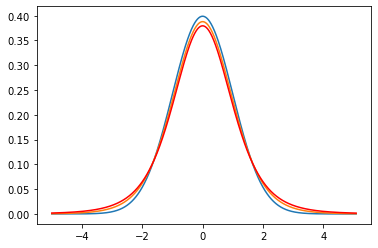

In [39]:
x = np.arange(start = -5, stop = 5.1, step = 0.01)
plt.plot(x,stats.norm.pdf(x=x))
plt.plot(x,stats.t.pdf(x=x, df=9))
plt.plot(x,stats.t.pdf(x=x, df=5),color='red')

Q6. 'dataset/titanic3.csv'을 불러와서 sex 와 embarked 칼럼을 각각 인덱스, 컬럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요. (단 embarked 컬럼의 null 값을 앞에 있는 값으로 대체 처리 선행)

In [124]:
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [125]:
titanic.embarked.fillna(method='ffill')

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [126]:
titanic_table= titanic.pivot_table(index=['sex'],columns=['embarked'],values=['survived'],aggfunc='mean')
titanic_table

survived                    
embarked         C         Q         S
sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170144

<AxesSubplot:xlabel='None-embarked', ylabel='sex'>

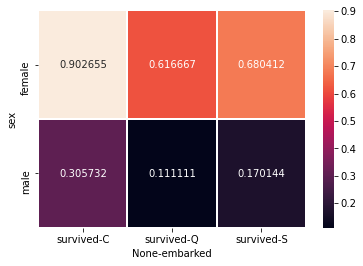

In [127]:
import seaborn as sns
sns.heatmap(titanic_table,annot=True,fmt='f',linewidth=1,cbar=True)

In [ ]:
# 여자가 남자에 비해 생존률이 월등히 높고, 특히나 승선지가 C인 경우에 여자는 대부분 생존했다.
# 승선지가 C인 경우 남자,여자 모두 생존율이 다른 승선지보다 높다. 

Q7. 주어진 3행 3열 배열의 역행렬을 구하고 검증하세요. (검증은 항등행렬을 출력)

In [49]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
mt1

array([[1, 2, 1],
       [2, 2, 3],
       [1, 3, 1]])

In [50]:
mt2= np.linalg.inv(mt1)
mt2

array([[ 7., -1., -4.],
       [-1.,  0.,  1.],
       [-4.,  1.,  2.]])

In [51]:
mt1.dot(mt2)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [53]:
import pandas as pd
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 12
fish_multi.iloc[10,1] = 12
fish_multi.iloc[12,1] = 1
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      12
6        A       4
7        A       5
8        A       5
9        A       6
10       B      12
11       B       6
12       B       1
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

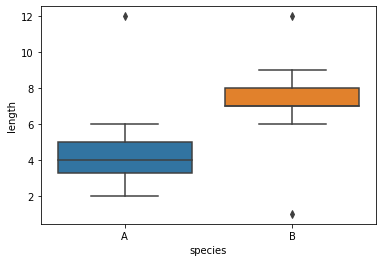

In [54]:
sns.boxplot(x='species',y='length',data=fish_multi)

In [55]:

group_A= fish_multi.groupby('species').get_group('A')
group_B= fish_multi.groupby('species').get_group('B')

Q1_A= group_A.length.describe()['25%']
Q2_A= group_A.length.describe()['75%']

Q1_B= group_B.length.describe()['25%']
Q2_B= group_B.length.describe()['75%']

iqr_A= Q2_A - Q1_A
iqr_B= Q2_B - Q1_B

upper_A= Q2_A + iqr_A*1.5
upper_B= Q2_B + iqr_B*1.5
lower_B= Q1_B - iqr_B*1.5

A_sort= group_A.length.sort_values(ascending=False)
B_sort_u= group_B.length.sort_values(ascending=False)
B_sort= group_B.length.sort_values(ascending=True)

print('A의 이상치')
print(group_A.loc[group_A.length>upper_A])

print()
print('B의 이상치')
print(group_B.loc[group_B.length<lower_B],group_B.loc[group_B.length>upper_B] )

A의 이상치
  species  length
5       A      12

B의 이상치
   species  length
12       B       1    species  length
10       B      12


<AxesSubplot:xlabel='species', ylabel='length'>

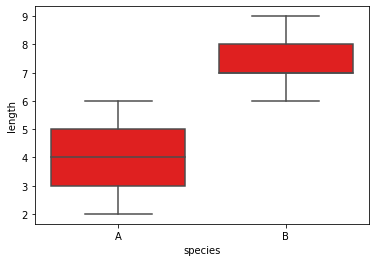

In [119]:
outlier= fish_multi[((fish_multi.species=='A')&(fish_multi.length==12))|
                   ((fish_multi.species=='B')&(fish_multi.length==12)|(fish_multi.length==1))].index

dd= fish_multi.drop(outlier)
sns.boxplot(x='species',y='length',data=dd, color= 'r')

<AxesSubplot:xlabel='species', ylabel='length'>

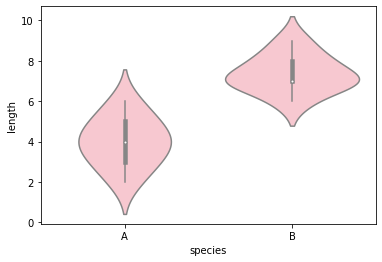

In [120]:
sns.violinplot(x='species',y='length',data=dd, color='pink')

Q9. df_auto mpg 컬럼과 horsepower 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
하나의 그래프로 표현하여 탐색 후 인사이트를 기술하세요.

In [113]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [114]:
df_auto.horsepower.replace({'?':np.nan},inplace=True)

In [115]:
df_auto.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.horsepower.isnull().sum()

0

In [116]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


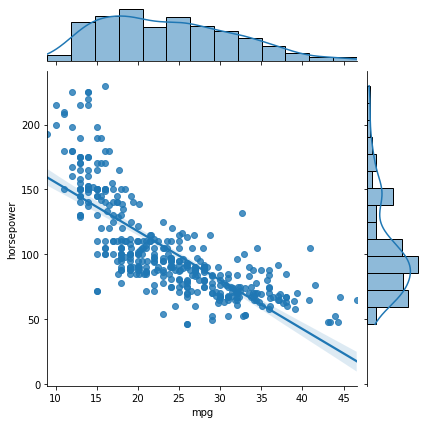

In [117]:
# import warnings
# warnings.filterwarnings('ignore')
sns.jointplot('mpg','horsepower',data=df_auto,kind='reg')

In [ ]:
# mpg가 높아질수록 horsepower는 낮아지는 형식의 음의 상관관계가 있다. 


Q10. FIFA 데이터셋을 불러와서 다음 사항을 수행하세요.
- 각 선수의 키는 Height변수에 피트와 인치로 입력되어 있습니다. 
이를 cm로 변환하여 새로운 변수 Height_cm을 생성하고 통계요약표를 구하세요
( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)
- 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,“Defender”, “GoalKeeper”로 재범주화하고, 변환하여 Position_Class 라는 변수를 생성하고 각 그룹별 Value평균을 구하세요.
    - Forward : ['LS','ST','RS','LW','LF','CF','RF','RW']
    - Midfielder : ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
    - Defender : ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
    - GoalKeeper

In [101]:
import pandas as pd
import numpy as np

data = pd.read_csv('./dataset/FIFA.csv',engine='python')
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [129]:
def ht_ex(x):
    f, i = map(int, x.split('\''))
    return f*30.48 + i*2.54

data['Height_cm'] = data['Height'].apply(ht_ex)
data.head()


,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,170.18,Foward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,187.96,Foward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,175.26,Foward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,193.04,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,180.34,Midfielder


In [104]:
def change(x):
    if x in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        return 'Foward'
    elif x in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        return 'Midfielder'
    elif x in ['LBW','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        return 'Defender'
    else:
        return 'GoalKeeper'


In [106]:
data['Position_Class'] = data['Position'].apply(change)
data.head()


,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,170.18,Foward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,187.96,Foward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,175.26,Foward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,193.04,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,180.34,Midfielder


In [107]:
data.groupby('Position_Class').Value.mean()

Position_Class
Defender      2104.697174
Foward        3035.026281
GoalKeeper    1616.634615
Midfielder    2865.531915
Name: Value, dtype: float64